In [1]:
%matplotlib inline 


import numpy as np #To use functions or constants that are in the NumPy module, type np.function_name. EG: np.pi is pi
import numpy.random as nprd #This imports random number generation functions
import scipy as sp #SciPy has lots of useful numerical methods, so we don't have to write them
import scipy.linalg as spla #This imports the sub-module containing linear algebra methods
import matplotlib.pyplot as plt #This will let us display images nicely
import cv2
import random
from scipy.integrate import odeint

In [2]:
# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity 
rhoxc=1041*3430
gamma=0.6923*3430
k=(1/2)*(10**4)
Q_low,Q_high=4,10
D=k/rhoxc

Tcool = 37

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy


u0 = Tcool * np.ones((nx, ny))


r, cx, cy = 1, 5, 5

In [3]:
D

0.0014003131100113985

In [4]:
#Heating at each time step 
def heat_source(nx,ny, r, cx, cy, Q_high, Q_low):
    Q = np.zeros((nx, ny))
    r2 = r**2
    for i in range(nx):
        for j in range(ny):
            p2 = (i*dx-cx)**2 + (j*dy-cy)**2
            if p2 < r2:
              #  Q[i,j] = random.uniform(Q_low,Q_high)*np.exp(-50*p2)
                Q[i,j]=9.322878220140868*np.exp(-50*p2)
    return(Q[1:-1, 1:-1])
Q=heat_source(nx,ny, r, cx, cy, Q_high, Q_low)



In [5]:
def ode_in_time_heating(u0_flat,t):
    u0= u0_flat.reshape((nx,ny),order='F')
    u = np.empty((nx, ny))
    u[1:-1, 1:-1] = D*(
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )+Q # -(gamma/rhoxc)*(u0[1:-1, 1:-1]-37)#+random_heat_source(nx,ny, r, cx, cy, Q_high, Q_low) -(gamma/rhoxc)*(u0[1:-1, 1:-1]-37)
    u_flat=u.flatten(order='F').astype(np.float)
    return u_flat

In [6]:
def ode_in_time_cooling(u0_flat,t):
    u0= u0_flat.reshape((nx,ny),order='F')
    u = np.empty((nx, ny))
    u[1:-1, 1:-1] = D*(
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 ) #-(gamma/rhoxc)*(u0[1:-1, 1:-1]-37)+random_heat_source(nx,ny, r, cx, cy, Q_high, Q_low) -(gamma/rhoxc)*(u0[1:-1, 1:-1]-37)
    u_flat=u.flatten(order='F').astype(np.float)
    return u_flat

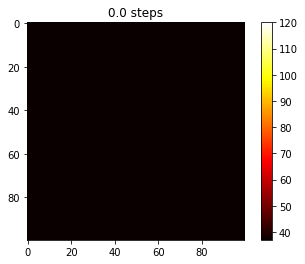

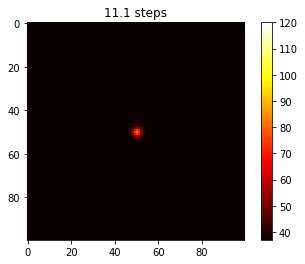

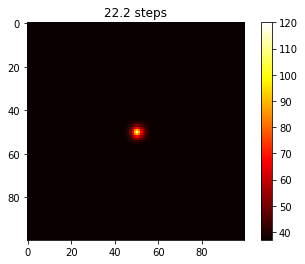

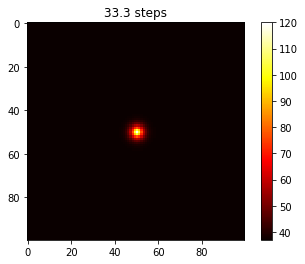

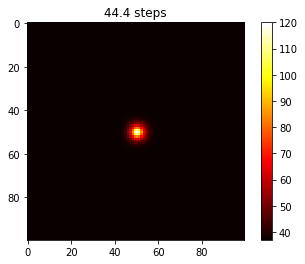

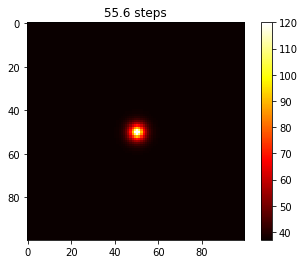

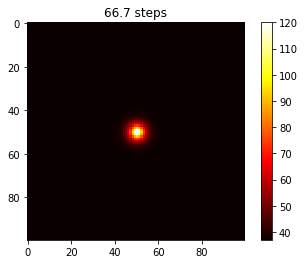

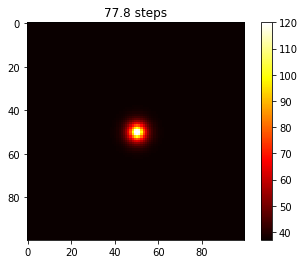

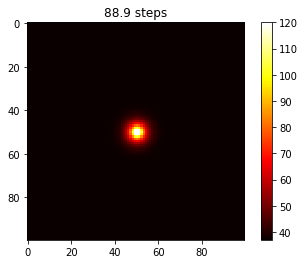

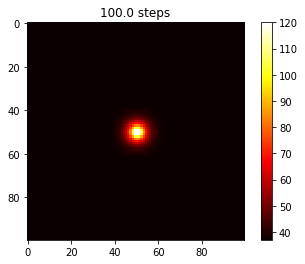

Cooling


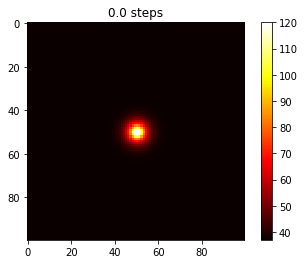

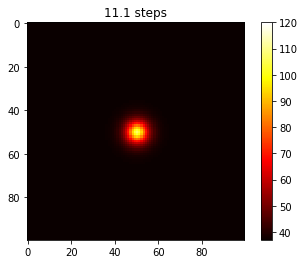

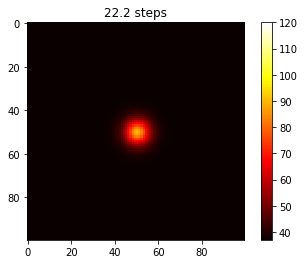

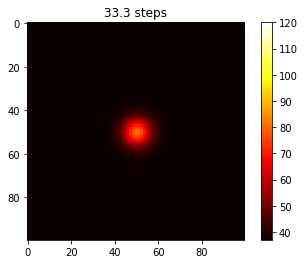

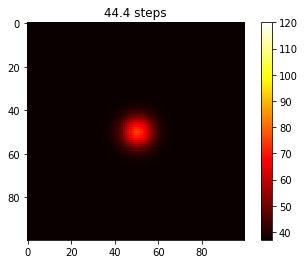

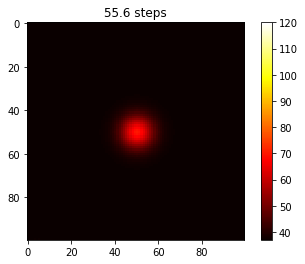

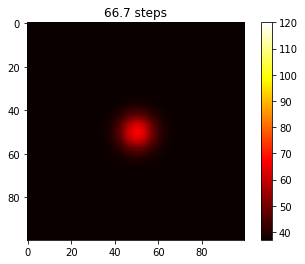

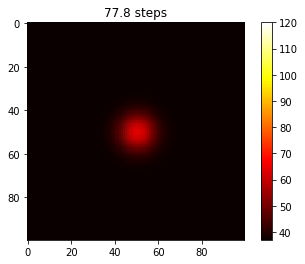

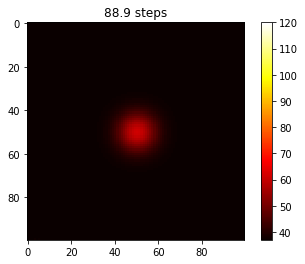

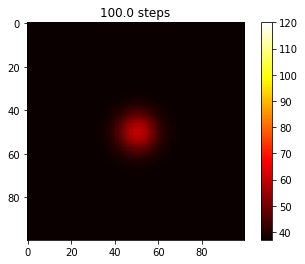

In [7]:
# Number of timesteps
nsteps = 100
t = np.linspace(0, nsteps, 10)
sol = odeint(ode_in_time_heating, u0.flatten(order='F').astype(np.float), t,hmax=0.5)
for i in range(np.shape(sol)[0]):
    time=t[i]
    solution=sol[i,:].reshape((nx,ny))
    plt.imshow(solution, cmap="hot", vmin=Tcool,vmax=120)
    plt.colorbar()
    plt.title('{:.1f} steps'.format(time))
    plt.show()
print('Cooling')
nsteps = 100
t = np.linspace(0, nsteps, 10)
sol = odeint(ode_in_time_cooling, sol[-1,:].flatten(order='F').astype(np.float), t)
for i in range(np.shape(sol)[0]):
    time=t[i]
    solution=sol[i,:].reshape((nx,ny))
    plt.imshow(solution, cmap="hot", vmin=Tcool,vmax=120)
    plt.colorbar()
    plt.title('{:.1f} steps'.format(time))
    plt.show()